## WeGo Data Introduction

In [5]:
import pandas as pd

In [18]:
wego = pd.read_csv('../notebooks/Headway Data, 8-1-2023 to 9-30-2023.csv')

wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [19]:
wego.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES'],
      dtype='object')

In the data, the bus route can be identified by its ROUTE_ABBR value.  
**3:** West End  
**7:** Hillsboro  
**22:** Bordeaux  
**23:** Dickerson Pike  
**50:** Charlotte Pike  
**52:** Nolensville Pike  
**55:** Murfreesboro Pike  
**56:** Gallatin Pike

In [20]:
wego['ROUTE_ABBR'].value_counts().sort_index()

ROUTE_ABBR
3     47162
7     18026
22    25959
23    42108
50    43291
52    51819
55    61944
56    60020
Name: count, dtype: int64

The trip can be identified by the DATE/CALENDAR_ID plus the TRIP_ID.  
**Warning:** The TRIP_ID refers to the route and time but will be used across multiple days.

The data contains multiple **time points** for each trip. There are more stops along the route than time points, but the time points are the points with specific scheduled times the bus operators must adhere to.

The first stop of a trip has a TRIP_EDGE of 1, the last has a TRIP_EDGE of 2, and the intermediate stops are TRIP_EDGE 0. 

Here is the first trip in the dataset. It was a Bordeaux route (Route 22), scheduled to start at 4:42:00 and end at 5:10:00.

In [21]:
wego[['DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR', 'TIME_POINT_ABBR', 'TRIP_EDGE', 'SCHEDULED_TIME']].loc[:3]

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME
0,2023-08-01,120230801,345104,22,MHSP,1,2023-08-01 04:42:00
1,2023-08-01,120230801,345104,22,ELIZ,0,2023-08-01 04:46:00
2,2023-08-01,120230801,345104,22,CV23,0,2023-08-01 04:54:00
3,2023-08-01,120230801,345104,22,MCC5_10,2,2023-08-01 05:10:00


Note that the same TRIP_ID appears on the following day.

In [22]:
(
    wego
    .loc[wego['DATE'].astype(str).isin(['2023-08-01', '2023-08-02'])]
    .loc[wego['TRIP_ID'] == 345104]
    [['DATE', 'ROUTE_ABBR', 'TRIP_ID', 'TIME_POINT_ABBR', 'TRIP_EDGE', 'ROUTE_DIRECTION_NAME', 'SCHEDULED_TIME', 'ROUTE_STOP_SEQUENCE']]
)

,DATE,ROUTE_ABBR,TRIP_ID,TIME_POINT_ABBR,TRIP_EDGE,ROUTE_DIRECTION_NAME,SCHEDULED_TIME,ROUTE_STOP_SEQUENCE
0,2023-08-01,22,345104,MHSP,1,TO DOWNTOWN,2023-08-01 04:42:00,14.0
1,2023-08-01,22,345104,ELIZ,0,TO DOWNTOWN,2023-08-01 04:46:00,10.0
2,2023-08-01,22,345104,CV23,0,TO DOWNTOWN,2023-08-01 04:54:00,5.0
3,2023-08-01,22,345104,MCC5_10,2,TO DOWNTOWN,2023-08-01 05:10:00,1.0
6461,2023-08-02,22,345104,MHSP,1,TO DOWNTOWN,2023-08-02 04:42:00,14.0
6462,2023-08-02,22,345104,ELIZ,0,TO DOWNTOWN,2023-08-02 04:46:00,10.0
6463,2023-08-02,22,345104,CV23,0,TO DOWNTOWN,2023-08-02 04:54:00,5.0
6464,2023-08-02,22,345104,MCC5_10,2,TO DOWNTOWN,2023-08-02 05:10:00,1.0


**Adherence** refers to the difference between scheduled time and the actual time that the bus departs from a stop.

A negative value for ADHERENCE indicates that the bus is late, and a positive indicates that the bus is early.

Generally, an adherence value less than -6 is considered late, and greater than 1 is considered early, but there are some exceptions. For example, a positive adherence for the end of a trip (TRIP_EDGE 2) is not considered early, since it is not a problem if a bus ends its trip early as long as it didn't pass other timepoints early along the way. You can check whether a trip was considered on-time, early, or late using the ADJUSTED_EARLY_COUNT, ADJUSTED_LATE_COUNT, and ADJUSTED_ONTIME_COUNT columns.

Here is an example of a trip where all time points would be considered to be on time. Notice that at the end of the trip, the bus was more than 6 minutes early, but was still counted as on-time since this was a trip edge of 2.

In [23]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[:3]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
0,2023-08-01,120230801,345104,22,MHSP,1,2023-08-01 04:42:00,2023-08-01 04:44:08,-2.133333,0,0,1
1,2023-08-01,120230801,345104,22,ELIZ,0,2023-08-01 04:46:00,2023-08-01 04:48:27,-2.450000,0,0,1
2,2023-08-01,120230801,345104,22,CV23,0,2023-08-01 04:54:00,2023-08-01 04:54:56,-0.933333,0,0,1
3,2023-08-01,120230801,345104,22,MCC5_10,2,2023-08-01 05:10:00,2023-08-01 05:03:43,6.283333,0,0,1


And one that has one late stop.

In [24]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[77:79]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
77,2023-08-01,120230801,345127,22,MHSP,1,2023-08-01 17:05:00,2023-08-01 17:08:21,-3.350000,0,0,1
78,2023-08-01,120230801,345127,22,CV23,0,2023-08-01 17:14:00,2023-08-01 17:20:10,-6.166666,0,1,0
79,2023-08-01,120230801,345127,22,MCC5_10,2,2023-08-01 17:30:00,2023-08-01 17:30:23,-0.383333,0,0,1


And one which was early.

In [25]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[11:13]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
11,2023-08-01,120230801,345107,22,MCC5_10,1,2023-08-01 06:15:00,2023-08-01 06:16:19,-1.316666,0,0,1
12,2023-08-01,120230801,345107,22,CV23,0,2023-08-01 06:25:00,2023-08-01 06:23:30,1.500000,1,0,0
13,2023-08-01,120230801,345107,22,MHSP,2,2023-08-01 06:35:00,2023-08-01 06:30:59,4.016666,0,0,1


**Headway** is the amount of time between a bus and the prior bus at the same stop. In the dataset, the amount of headway scheduled is contained in the SCHEDULED_HDWY column and indicates the difference between the scheduled time for a particular stop and the scheduled time for the previous bus on that same stop.

This dataset contains a column HDWY_DEV, which shows the amount of deviation from the scheduled headway. **Bunching** occurs when there is shorter headway than scheduled, which would appear as a negative HDWY_DEV value. **Gapping** is when there is more headway than scheduled and appears as a positive value in the HDWY_DEV column. Note that you can calculate headway deviation percentage as HDWY_DEV/SCHEDULED_HDWY. 

The generally accepted range of headway deviation is 50% to 150% of the scheduled headway, so if scheduled headway is 10 minutes, a headway deviation of up to 5 minutes would be acceptable (but not ideal).

In [26]:
(
    wego
    .loc[wego['ROUTE_ABBR'] == 22]
    .loc[wego['ROUTE_DIRECTION_NAME'] == 'TO DOWNTOWN']
    .loc[wego['TIME_POINT_ABBR'] == 'CV23']
    [['DATE', 'TRIP_ID', 'TIME_POINT_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
      'SCHEDULED_TIME', 'SCHEDULED_HDWY',
      'ACTUAL_DEPARTURE_TIME', 'ACTUAL_HDWY', 'HDWY_DEV'
     ]]
    .sort_values(['DATE', 'SCHEDULED_TIME'])
    .iloc[:5]
)

,DATE,TRIP_ID,TIME_POINT_ABBR,ROUTE_DIRECTION_NAME,TRIP_EDGE,SCHEDULED_TIME,SCHEDULED_HDWY,ACTUAL_DEPARTURE_TIME,ACTUAL_HDWY,HDWY_DEV
2,2023-08-01,345104,CV23,TO DOWNTOWN,0,2023-08-01 04:54:00,NaN,2023-08-01 04:54:56,NaN,NaN
126,2023-08-01,345213,CV23,TO DOWNTOWN,0,2023-08-01 05:19:00,25.0,2023-08-01 05:18:59,24.050000,-0.950000
402,2023-08-01,345405,CV23,TO DOWNTOWN,0,2023-08-01 05:39:00,20.0,2023-08-01 05:39:40,20.683333,0.683333
9,2023-08-01,345106,CV23,TO DOWNTOWN,0,2023-08-01 05:54:00,15.0,2023-08-01 05:54:11,14.516666,-0.483334
316,2023-08-01,345377,CV23,TO DOWNTOWN,0,2023-08-01 06:09:00,15.0,2023-08-01 06:10:01,15.833333,0.833333


Two other columns that you've been asked to explore are the DWELL_IN_MINS column and SCHEDULED_LAYOVER_MINUTES, which shows the difference between actual arrival and actual departure time at a time point and the time a bus was scheduled to arrive at the time point and when it is scheduled to leave at the beginning of a trip.

Here, we can see the end of the first trip in the dataset and the beginning of the next trip, which goes in the opposite direction.

In [27]:
wego.loc[3:4, ['DATE', 'TRIP_ID', 'TRIP_EDGE', 'TIME_POINT_ABBR',
               'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'DWELL_IN_MINS', 'SCHEDULED_LAYOVER_MINUTES']]

,DATE,TRIP_ID,TRIP_EDGE,TIME_POINT_ABBR,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
3,2023-08-01,345104,2,MCC5_10,2023-08-01 05:03:43,2023-08-01 05:03:43,0.000000,NaN
4,2023-08-01,345105,1,MCC5_10,2023-08-01 05:03:43,2023-08-01 05:16:35,12.866666,5.0


In [28]:
adherence_labels = []

In [30]:
for index, row in wego.iterrows():
    if row['ADJUSTED_LATE_COUNT'] == 1:
        adherence_labels.append('Late')
    elif row['ADJUSTED_EARLY_COUNT'] == 1:
            if row['TRIP_EDGE'] == 2:
            adherence_labels.append('On-Time')
        else:
            adherence_labels.append('Early')
    elif row['ADJUSTED_ONTIME_COUNT'] == 1:
        adherence_labels.append('On-Time')
    else:
        adherence_labels.append('Unknown')

In [31]:
wego['ADHERENCE_STATUS'] = adherence_labels

In [34]:
wego

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ADHERENCE_STATUS
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,0.0,0,6.500000,NaN,On-Time
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,0.0,0,0.000000,NaN,On-Time
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,0.0,0,0.000000,NaN,On-Time
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,NaN,0,0.000000,NaN,On-Time
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,0,0,1,0,0.0,0,12.866666,5.0,On-Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,5.266666,0,1,0,0,0.0,0,0.000000,NaN,Late
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,NaN,0,1,0,0,NaN,0,0.000000,NaN,Late
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,1.866666,0,0,1,0,0.0,0,0.000000,NaN,On-Time
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,17.500000,0,1,0,0,0.0,0,0.000000,NaN,Late


In [36]:
wego.ADHERENCE_STATUS.value_counts()

ADHERENCE_STATUS
On-Time    270790
Late        59038
Unknown     11468
Early        9033
Name: count, dtype: int64

In [39]:
def get_adherence_status(row):
  
    if row['ADJUSTED_LATE_COUNT'] == 1:
        return 'Late'
    elif row['ADJUSTED_EARLY_COUNT'] == 1:
      
        if row['TRIP_EDGE'] == 2:
            return 'On-Time' 
        else:
            return 'Early'
    elif row['ADJUSTED_ONTIME_COUNT'] == 1:
        return 'On-Time'
    else:
        return 'Unknown' 


In [40]:
wego

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ADHERENCE_STATUS
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,0.0,0,6.500000,NaN,On-Time
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,0.0,0,0.000000,NaN,On-Time
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,0.0,0,0.000000,NaN,On-Time
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,NaN,0,0.000000,NaN,On-Time
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,0,0,1,0,0.0,0,12.866666,5.0,On-Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,5.266666,0,1,0,0,0.0,0,0.000000,NaN,Late
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,NaN,0,1,0,0,NaN,0,0.000000,NaN,Late
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,1.866666,0,0,1,0,0.0,0,0.000000,NaN,On-Time
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,17.500000,0,1,0,0,0.0,0,0.000000,NaN,Late


In [97]:
driver_performance = wego.groupby('ROUTE_ABBR')['ADHERENCE_STATUS'].value_counts()
driver_performance.sort_values(ascending = False)

ROUTE_ABBR  ADHERENCE_STATUS
56          On-Time             48459
55          On-Time             42146
52          On-Time             37812
50          On-Time             36511
23          On-Time             35275
3           On-Time             34601
22          On-Time             22517
55          Late                16748
7           On-Time             13469
52          Late                10038
3           Late                 9590
56          Late                 8837
50          Late                 5113
7           Late                 3417
23          Late                 3230
52          Unknown              2492
23          Unknown              2455
22          Late                 2065
3           Unknown              1674
56          Early                1654
55          Unknown              1585
52          Early                1477
55          Early                1465
3           Early                1297
23          Early                1148
56          Unknown  

In [111]:
df = driver_performance.to_frame().reset_index()
df

,ROUTE_ABBR,ADHERENCE_STATUS,count
0,3,On-Time,34601
1,3,Late,9590
2,3,Unknown,1674
3,3,Early,1297
4,7,On-Time,13469
5,7,Late,3417
6,7,Unknown,759
7,7,Early,381
8,22,On-Time,22517
9,22,Late,2065


In [63]:
ontime_operators = df[df['ADHERENCE_STATUS'] == 'On-Time'].sort_values(by = 'count', ascending = False)
ontime_operators

,OPERATOR,ADHERENCE_STATUS,count
180,1266,On-Time,2522
127,1133,On-Time,2505
130,1147,On-Time,2439
485,1927,On-Time,2343
45,409,On-Time,2310
...,...,...,...
2,235,On-Time,6
649,2256,On-Time,6
1,56,On-Time,3
1085,2982,On-Time,2


In [65]:
late_operators = df[df['ADHERENCE_STATUS'] == 'Late'].sort_values(by = 'count', ascending = False)
late_operators

,OPERATOR,ADHERENCE_STATUS,count
571,2109,Late,936
411,1800,Late,810
157,1204,Late,767
1132,3064,Late,750
201,1352,Late,728
...,...,...,...
59,473,Late,1
719,2377,Late,1
780,2493,Late,1
774,2472,Late,1


In [64]:
early_operators = df[df['ADHERENCE_STATUS'] == 'Early'].sort_values(by = 'count', ascending = False)
early_operators

,OPERATOR,ADHERENCE_STATUS,count
95,659,Early,354
575,2112,Early,234
689,2352,Early,184
381,1761,Early,178
361,1717,Early,177
...,...,...,...
459,1880,Early,1
337,1673,Early,1
351,1706,Early,1
9,301,Early,1


In [72]:
direction = wego.groupby(['ROUTE_DIRECTION_NAME', 'ADHERENCE_STATUS']).count()
direction

CALENDAR_ID  SERVICE_ABBR  \
ROUTE_DIRECTION_NAME ADHERENCE_STATUS                              
FROM DOWNTOWN        Early                    4638          4638   
                     Late                    39601         39601   
                     On-Time                135067        135067   
                     Unknown                  6487          6487   
TO DOWNTOWN          Early                    4395          4395   
                     Late                    19437         19437   
                     On-Time                135723        135723   
                     Unknown                  4981          4981   

                                       ADHERENCE_ID    DATE  ROUTE_ABBR  \
ROUTE_DIRECTION_NAME ADHERENCE_STATUS                                     
FROM DOWNTOWN        Early                     4638    4638        4638   
                     Late                     39601   39601       39601   
                     On-Time                 135067  135067      135067   
                     Unknown                   6487    6487        6487   
TO DOWNTOWN          Early                     4395    4395        4395   
                     Late                     19437   19437       19437   
                     On-Time                 135723  135723      135723   
                     Unknown                   4981    4981        4981   

                                       BLOCK_ABBR  OPERATOR  TRIP_ID  \
ROUTE_DIRECTION_NAME ADHERENCE_STATUS                                  
FROM DOWNTOWN        Early                   4638      4638     4638   
                     Late                   39601     39601    39601   
                     On-Time               135067    135067   135067   
                     Unknown                 6487      6487     6487   
TO DOWNTOWN          Early                   4395      4395     4395   
                     Late                   19437     19437    19437   
                     On-Time               135723    135723   135723   
                     Unknown                 4981      4981     4981   

                                       OVERLOAD_ID  TIME_POINT_ABBR  ...  \
ROUTE_DIRECTION_NAME ADHERENCE_STATUS                                ...   
FROM DOWNTOWN        Early                    4638             4638  ...   
                     Late                    39601            39601  ...   
                     On-Time                135067           135067  ...   
                     Unknown                  6487             6487  ...   
TO DOWNTOWN          Early                    4395             4395  ...   
                     Late                    19437            19437  ...   
                     On-Time                135723           135723  ...   
                     Unknown                  4981             4981  ...   

                                       ACTUAL_HDWY  HDWY_DEV  \
ROUTE_DIRECTION_NAME ADHERENCE_STATUS                          
FROM DOWNTOWN        Early                    4511      4511   
                     Late                    30932     30894   
                     On-Time                106060    105987   
                     Unknown                     0         0   
TO DOWNTOWN          Early                    4252      4252   
                     Late                    14946     14937   
                     On-Time                105361    105312   
                     Unknown                     0         0   

                                       ADJUSTED_EARLY_COUNT  \
ROUTE_DIRECTION_NAME ADHERENCE_STATUS                         
FROM DOWNTOWN        Early                             4638   
                     Late                             39601   
                     On-Time                         135067   
                     Unknown                           6487   
TO DOWNTOWN          Early                             4395   
                     Late                  

DIRECTION

In [73]:
direction = wego.groupby(['ROUTE_DIRECTION_NAME', 'ADHERENCE_STATUS']).size()
direction

ROUTE_DIRECTION_NAME  ADHERENCE_STATUS
FROM DOWNTOWN         Early                 4638
                      Late                 39601
                      On-Time             135067
                      Unknown               6487
TO DOWNTOWN           Early                 4395
                      Late                 19437
                      On-Time             135723
                      Unknown               4981
dtype: int64

ROUTE

In [85]:
route = wego.groupby(['ROUTE_ABBR', 'ADHERENCE_STATUS']).size()
route.head(60)

ROUTE_ABBR  ADHERENCE_STATUS
3           Early                1297
            Late                 9590
            On-Time             34601
            Unknown              1674
7           Early                 381
            Late                 3417
            On-Time             13469
            Unknown               759
22          Early                 606
            Late                 2065
            On-Time             22517
            Unknown               771
23          Early                1148
            Late                 3230
            On-Time             35275
            Unknown              2455
50          Early                1005
            Late                 5113
            On-Time             36511
            Unknown               662
52          Early                1477
            Late                10038
            On-Time             37812
            Unknown              2492
55          Early                1465
            Late     

In [87]:
wego['HOUR'] = pd.to_datetime(wego['SCHEDULED_TIME']).dt.hour
wego

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ADHERENCE_STATUS,HOUR
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,0,1,0,0.0,0,6.500000,NaN,On-Time,4
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,0,1,0,0.0,0,0.000000,NaN,On-Time,4
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,0,1,0,0.0,0,0.000000,NaN,On-Time,4
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,0,1,0,NaN,0,0.000000,NaN,On-Time,5
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,0,0,1,0,0.0,0,12.866666,5.0,On-Time,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,0,1,0,0,0.0,0,0.000000,NaN,Late,22
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,0,1,0,0,NaN,0,0.000000,NaN,Late,22
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,0,0,1,0,0.0,0,0.000000,NaN,On-Time,22
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,0,1,0,0,0.0,0,0.000000,NaN,Late,22


In [92]:
hourly_adherence = wego.groupby(['HOUR', 'ADHERENCE_STATUS']).size()
hourly_adherence.head(20)

HOUR  ADHERENCE_STATUS
0     Early                 187
      Late                  791
      On-Time              3042
      Unknown               201
1     Early                   4
      Late                   28
      On-Time                79
      Unknown                12
4     Early                  70
      Late                   39
      On-Time              1581
      Unknown                34
5     Early                 371
      Late                  426
      On-Time              9283
      Unknown               386
6     Early                 529
      Late                 1440
      On-Time             17370
      Unknown               641
dtype: int64

HOUR

In [93]:
wego['DAY_OF_WEEK'] = pd.to_datetime(wego['DATE']).dt.day_name()
wego

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ADHERENCE_STATUS,HOUR,DAY_OF_WEEK
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,1,0,0.0,0,6.500000,NaN,On-Time,4,Tuesday
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,1,0,0.0,0,0.000000,NaN,On-Time,4,Tuesday
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,1,0,0.0,0,0.000000,NaN,On-Time,4,Tuesday
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,1,0,NaN,0,0.000000,NaN,On-Time,5,Tuesday
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,0,1,0,0.0,0,12.866666,5.0,On-Time,5,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,1,0,0,0.0,0,0.000000,NaN,Late,22,Saturday
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,1,0,0,NaN,0,0.000000,NaN,Late,22,Saturday
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,0,1,0,0.0,0,0.000000,NaN,On-Time,22,Saturday
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,1,0,0,0.0,0,0.000000,NaN,Late,22,Saturday


DAY

In [105]:
daily_adherence = wego.groupby(['DAY_OF_WEEK', 'ADHERENCE_STATUS']).size().unstack().fillna(0)
daily_adherence

ADHERENCE_STATUS,Early,Late,On-Time,Unknown
DAY_OF_WEEK,,,,
Friday,1429,12389,42096,2559
Monday,1532,6005,40452,1127
Saturday,780,6747,29003,967
Sunday,809,3346,24291,1382
Thursday,1433,10667,44167,2189
Tuesday,1549,9587,45638,1658
Wednesday,1501,10297,45143,1586


In [106]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_adherence = daily_adherence.reindex(day_order)
daily_adherence

ADHERENCE_STATUS,Early,Late,On-Time,Unknown
DAY_OF_WEEK,,,,
Monday,1532,6005,40452,1127
Tuesday,1549,9587,45638,1658
Wednesday,1501,10297,45143,1586
Thursday,1433,10667,44167,2189
Friday,1429,12389,42096,2559
Saturday,780,6747,29003,967
Sunday,809,3346,24291,1382


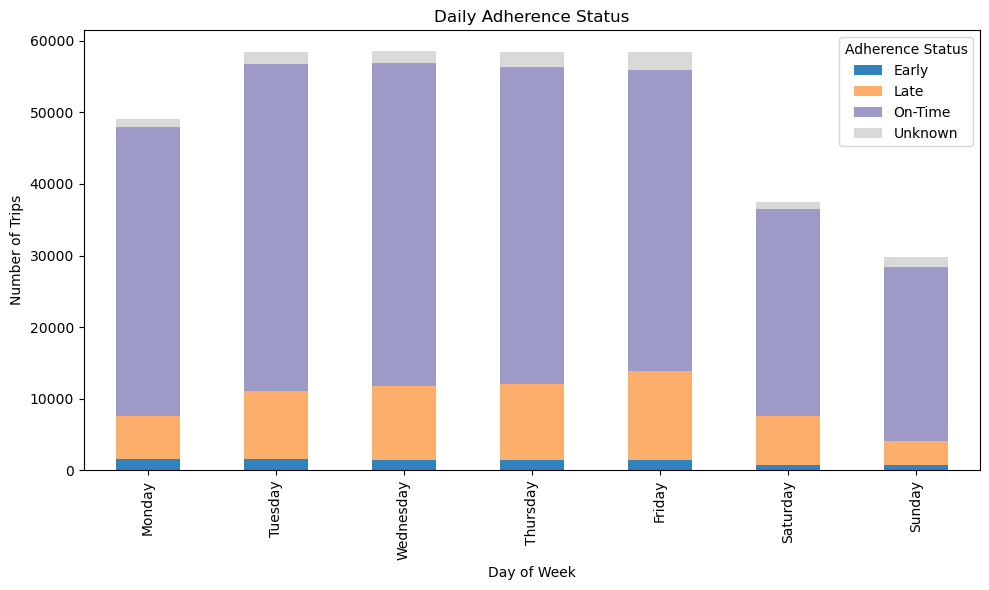

In [107]:
import matplotlib.pyplot as plt

daily_adherence.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20c')

plt.title('Daily Adherence Status')
plt.ylabel('Number of Trips')
plt.xlabel('Day of Week')
plt.legend(title='Adherence Status')
plt.tight_layout()
plt.show()


In [108]:
# Get total trips per day
total_by_day = wego.groupby('DAY_OF_WEEK').size()

# Get only on-time trips per day
ontime_by_day = wego[wego['ADHERENCE_STATUS'] == 'On-Time'].groupby('DAY_OF_WEEK').size()

# Calculate on-time performance %
ontime_percent_by_day = (ontime_by_day / total_by_day * 100).reindex(day_order)


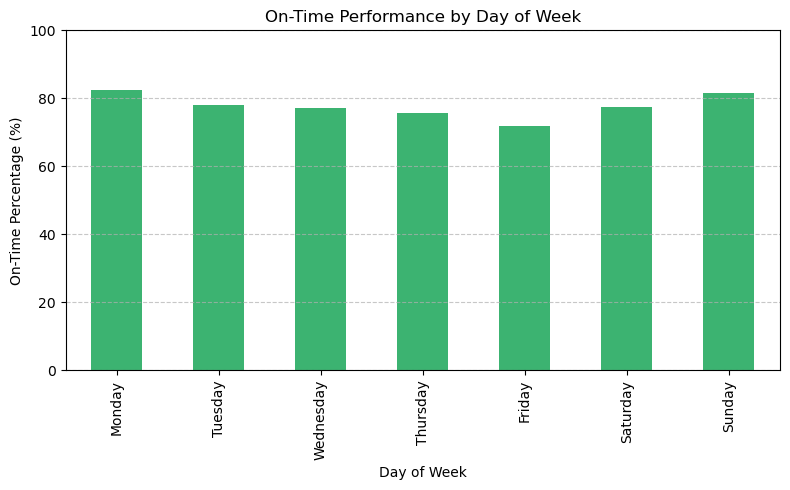

In [109]:
import matplotlib.pyplot as plt

ontime_percent_by_day.plot(kind='bar', color='mediumseagreen', figsize=(8, 5))

plt.title('On-Time Performance by Day of Week')
plt.ylabel('On-Time Percentage (%)')
plt.xlabel('Day of Week')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
